In [1]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [2]:
from rdkit import Chem
from rdkit.Chem import Mol
from rdkit.Chem import inchi

def is_same_mol(mol1: Mol, mol2: Mol):
    inchi1 = inchi.MolToInchiKey(mol1)
    inchi2 = inchi.MolToInchiKey(mol2)
    return inchi1 == inchi2

def print_atoms_and_labels(mol: Mol):
    for a in mol.GetAtoms():
        text = a.GetSymbol() + ", MapNum: " + str(a.GetAtomMapNum())
        if a.HasProp('atomLabel'):
            text += ", label: " + a.GetProp("atomLabel")
        print(text)

In [97]:
%load_ext autoreload
%autoreload 2
from utils import MonomersLib, HELMConverter

monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library.xml"
lib = MonomersLib.load(monomers_lib_path)
converter = HELMConverter(lib)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[13:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[13:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors


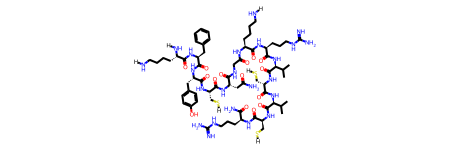

In [90]:
helm1 = "PEPTIDE1{G.R.G.D.S.P}$$$$"
helm2 = "PEPTIDE1{A.A.A}$$$$"
helm3 = "PEPTIDE1{A}$$$$"
helm = "PEPTIDE1{K.F.Y.C.N.G.K.R.V.C.V.C.R.[am]}$$$$"

helm_list = HELMConverter.split_helm(helm)
mol = converter.mol_from_single_polymer(helm_list)
mol = converter.close_residual_attachment_points(mol)
mol

In [91]:
mol_h = Chem.MolFromHELM(helm)
is_same_mol(mol, mol_h)

True

In [98]:
helm_c = "PEPTIDE1{[ac].Y.[dC].[dD].[dP].[dC]}$PEPTIDE1,PEPTIDE1,6:R3-3:R3$$$"
helm_parts = helm_c.split('$')
polymer_tokens = HELMConverter.split_helm(helm_parts[0])
bond_tokens = HELMConverter.split_helm(helm_parts[1])

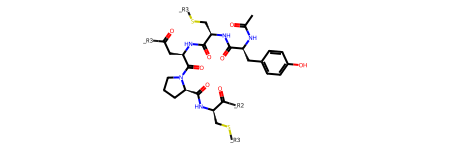

In [99]:
mol = converter.mol_from_single_polymer(polymer_tokens)
mol

In [100]:
bond_tokens

['PEPTIDE1', ',', 'PEPTIDE1', ',', '6', ':', 'R3', '-', '3', ':', 'R3']

In [101]:
converter.parse_bonds(bond_tokens)

[('PEPTIDE1', '6', 'R3', 'PEPTIDE1', '3', 'R3')]

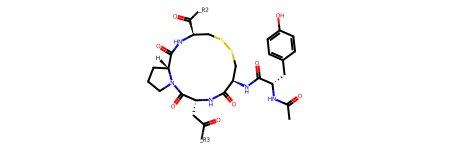

In [102]:
b0 = converter.parse_bonds(bond_tokens)[0]
mol = converter.add_bond_in_single_polymer(mol, b0[0], b0[1], b0[2], b0[3], b0[4], b0[5])
mol

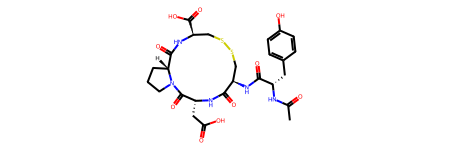

In [103]:
mol = converter.close_residual_attachment_points(mol)
mol

In [104]:
mol_h2 = Chem.MolFromHELM(helm_c)
is_same_mol(mol, mol_h2)

True